In [1]:
import time

import numpy as np
import prince
import pandas as pd
import sklearn.cluster as skcl
import sklearn.metrics as skmet
import sklearn.preprocessing as skpre
import scipy
import matplotlib.pyplot as plt

In [2]:
def generateMCA(data, nbrDim):
    mcaData = prince.MCA(n_components=nbrDim, benzecri=False).fit(data)
    return mcaData.row_coordinates(data)

In [3]:
def clusterHiera(data, nbrCluster):
    Z = scipy.cluster.hierarchy.linkage(data, method="centroid", metric="euclidean")
    nodes = scipy.cluster.hierarchy.fcluster(Z, nbrCluster, criterion="maxclust")
    return skmet.silhouette_score(data, labels=nodes, metric="euclidean")

In [4]:
def generateSilhouettePlot(data, dimRedMethod, clusteringMethod, dimRange, maxCluster, iter, title, legendLabel):
    print("Generating plot for " + legendLabel + str(dimRange[0]) + " to " + str(dimRange[1]) + " with varying clusters from 2 to " + str(maxCluster))
    t = time.time()
    calculatedData = []
    for i in range(dimRange[0], dimRange[1]+1):
        print("Doing dim " + str(i))
        meanScore = np.array([0. for i in range(2, maxCluster+1)])
        for k in range(iter):
            pointsData = dimRedMethod(data, i)
            #print("[iter="+str(k)+"; dim="+str(i)+"] Generated point cloud")
            for j in range(2, maxCluster+1):
                clusterScore = clusteringMethod(pointsData, j)
                #print("[iter="+str(k)+"; dim="+str(i)+"] Calculated cluster score for " + str(j) + " clusters :")
                #print(clusterScore)
                meanScore[j-2] = clusterScore + meanScore[j-2]
        meanScore = meanScore/iter
        calculatedData.append(meanScore)
        plt.plot([i for i in range(2, maxCluster+1)], meanScore, label = legendLabel + str(i))

    print("Finished : " +str(time.time() - t))
    plt.title(title)
    plt.ylabel("Silhouette score")
    plt.xlabel("Number of clusters")
    plt.legend()
    return calculatedData

Generating plot for dim=2 to 9 with varying clusters from 2 to 10
Doing dim 2
Doing dim 3
Doing dim 4
Doing dim 5
Doing dim 6
Doing dim 7


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

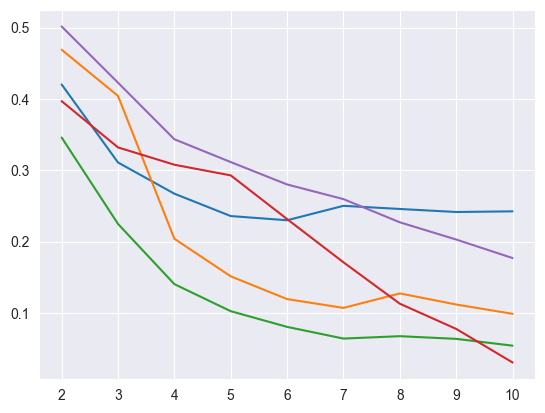

In [9]:
mcahieradata = generateSilhouettePlot(
    data=pd.read_csv("dataset/preprocessed-shootings.csv"),
    dimRedMethod=generateMCA,
    clusteringMethod=clusterHiera,
    dimRange=[2, 9],
    maxCluster=10,
    iter=10,
    title="[MCA+Hiera] Silhouette score on different dimensions depending on clusters number, avg of 30",
    legendLabel="dim="
)
plt.show()

In [ ]:
mcahieradata